In [ ]:
!pip install feast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.1/453.1 kB 22.6 MB/s eta 0:00:00
  Attempting uninstall: uvicorn
    Found existing i

In [ ]:
import feast

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor

## Loading the dataset

In [ ]:
df_original = pd.read_csv('mw_pw_profiles (1).csv', low_memory = False)

In [ ]:
df_original.columns

Index(['player_id', 'match_id', 'gender', 'balls_per_over', 'start_date',
       'series_name', 'match_type', 'name_x', 'runs_scored', 'player_out',
       'balls_faced', 'fours_scored', 'sixes_scored', 'catches_taken',
       'run_out_direct', 'run_out_throw', 'stumpings_done', 'out_kind',
       'dot_balls_as_batsman', 'order_seen', 'balls_bowled', 'runs_conceded',
       'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y',
       'unique_name', 'key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams',
       'fantasy_score_batting', 'fantasy_score_bowling',


## Dropping Unnecessary columns :

In [ ]:
df_original.drop(['gender', 'balls_per_over', 'series_name', 'name_y', 'unique_name','key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'full_name',
        'key_pulse_2', 'batting_style', 'bowling_style', 'playing_role', 'teams', ], axis = 1, inplace = True)

In [ ]:
df_original.columns

Index(['player_id', 'match_id', 'start_date', 'match_type', 'name_x',
       'runs_scored', 'player_out', 'balls_faced', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'out_kind', 'dot_balls_as_batsman', 'order_seen',
       'balls_bowled', 'runs_conceded', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'dot_balls_as_bowler', 'player_team',
       'opposition_team', 'fantasy_score_batting', 'fantasy_score_bowling',
       'fantasy_score_total'],
      dtype='object')

In [ ]:
df_original.head()

,player_id,match_id,start_date,match_type,name_x,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,15688,1158348,21-08-18,T20,M King,10.0,1.0,30.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Sierra Leone,Namibia,5.0,8.0,17.0
1,15688,1182644,05-05-19,T20,M King,8.0,1.0,18.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Sierra Leone,Uganda,3.0,0.0,7.0
2,15688,1275107,09-09-21,T20,M King,1.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Sierra Leone,Nigeria,1.0,0.0,5.0
3,15688,1275113,15-09-21,T20,M King,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Sierra Leone,Cameroon,0.0,0.0,4.0
4,15688,1275125,14-09-21,T20,M King,1.0,1.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Sierra Leone,Uganda,-5.0,0.0,-1.0


## removal of null values

In [ ]:
df_original = df_original.dropna()


In [ ]:
df_original.isnull().sum()

,0
player_id,0
match_id,0
start_date,0
match_type,0
name_x,0
runs_scored,0
player_out,0
balls_faced,0
fours_scored,0
sixes_scored,0


## Sorting the dataframe using date

In [ ]:
df_original['start_date'] = pd.to_datetime(df_original['start_date'], errors='coerce')

df_original.sort_values(by=['start_date'], inplace=True)
df_original.reset_index(drop=True, inplace=True)

/tmp/ipython-input-14-1081118028.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_original['start_date'] = pd.to_datetime(df_original['start_date'], errors='coerce')


In [ ]:
df_original.head()

,player_id,match_id,start_date,match_type,name_x,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,2975a46c,63963,2001-12-19,Test,SS Das,28.0,1.0,105.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,India,England,32.0,8.0,44.0
1,4bd33839,63963,2001-12-19,Test,MR Ramprakash,58.0,1.0,133.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,England,India,67.0,0.0,71.0
2,0184dc35,63963,2001-12-19,Test,R Dravid,3.0,1.0,61.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,India,England,3.0,14.0,21.0
3,725529bc,63963,2001-12-19,Test,SC Ganguly,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,3.0,70.0,India,England,-4.0,0.0,0.0
4,6e1b1ec0,63963,2001-12-19,Test,MP Vaughan,64.0,1.0,138.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,England,India,76.0,12.0,92.0


In [ ]:
df_original.tail()

,player_id,match_id,start_date,match_type,name_x,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
416707,4e38a3d6,1485778,2025-05-20,T20,R Poddar,4,1,10,0,0,...,0,0,0,0,0,Nepal,Thailand,-2,0,2
416708,bd36bc39,1485778,2025-05-20,T20,S Chaturongrattana,0,0,0,0,0,...,0,0,0,0,8,Thailand,Nepal,0,16,20
416709,f6ddfe08,1485778,2025-05-20,T20,C Sutthiruang,0,0,0,0,0,...,0,0,0,0,10,Thailand,Nepal,0,12,16
416710,a2f46292,1473500,2025-05-20,T20,KK Ahmed,0,0,0,0,0,...,0,0,0,0,6,Chennai Super Kings,Rajasthan Royals,0,-4,0
416711,97e6e41a,1485778,2025-05-20,T20,K Kunwar,24,0,33,1,0,...,0,0,0,0,10,Nepal,Thailand,25,0,29


## Feature Engineering

In [ ]:
df_features = df_original.copy()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_features['player_id']= label_encoder.fit_transform(df_features['player_id'])
df_features['player_team']= label_encoder.fit_transform(df_features['opposition_team'])

In [ ]:
df_features.drop(['match_id'], inplace=True, axis=1)

KeyError: "['match_id'] not found in axis"

In [ ]:
df_features.drop(['out_kind'],inplace = True, axis = 1)

In [ ]:
df_features = pd.get_dummies(df_features, columns = ['match_type'], drop_first = True, dtype = int)

In [ ]:
df_features['strike_rate'] = (df_features['runs_scored'] / df_features['balls_faced'])*100

In [ ]:
df_features['economy_rate'] = (df_features['runs_conceded'] / df_features['balls_bowled'])*100

In [ ]:
df_features.drop(['balls_faced', 'runs_conceded', 'balls_bowled', 'player_out', 'dot_balls_as_batsman', 'dot_balls_as_bowler', 'fantasy_score_batting', 'fantasy_score_bowling'], inplace = True, axis = 1)

In [ ]:
df_features['match_id'] = df_original['match_id']

In [ ]:
df_features.columns

Index(['player_id', 'start_date', 'name_x', 'runs_scored', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'order_seen', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'player_team', 'opposition_team',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'strike_rate',
       'economy_rate', 'match_id'],
      dtype='object')

In [ ]:
df_features.drop(['order_seen'], inplace = True, axis = 1)

In [ ]:
df_features['runs_scored_1'] = df_features['runs_scored'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['runs_scored_2'] = df_features['runs_scored'].shift(-1).ewm(span=2, adjust=False).mean()
df_features['runs_scored_5'] = df_features['runs_scored'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['runs_scored_10'] = df_features['runs_scored'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['fours_scored_1'] = df_features['fours_scored'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['fours_scored_5'] = df_features['fours_scored'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['fours_scored_10'] = df_features['fours_scored'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['sixes_scored_1'] = df_features['sixes_scored'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['sixes_scored_5'] = df_features['sixes_scored'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['sixes_scored_10'] = df_features['sixes_scored'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['catches_taken_1'] = df_features['catches_taken'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['catches_taken_5'] = df_features['catches_taken'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['catches_taken_10'] = df_features['catches_taken'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['run_out_direct_5'] = df_features['run_out_direct'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['run_out_direct_10'] = df_features['run_out_direct'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['run_out_throw_1'] = df_features['run_out_throw'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['run_out_throw_5'] = df_features['run_out_throw'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['run_out_throw_10'] = df_features['run_out_throw'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['stumpings_done_5'] = df_features['stumpings_done'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['stumpings_done_10'] = df_features['stumpings_done'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['wickets_taken_1'] = df_features['wickets_taken'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['wickets_taken_2'] = df_features['wickets_taken'].shift(-1).ewm(span=2, adjust=False).mean()
df_features['wickets_taken_5'] = df_features['wickets_taken'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['wickets_taken_10'] = df_features['wickets_taken'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['bowled_done_1'] = df_features['bowled_done'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['bowled_done_5'] = df_features['bowled_done'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['bowled_done_10'] = df_features['bowled_done'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['lbw_done_5'] = df_features['lbw_done'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['lbw_done_10'] = df_features['lbw_done'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['maidens_1'] = df_features['maidens'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['maidens_5'] = df_features['maidens'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['maidens_10'] = df_features['maidens'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['strike_rate_1'] = df_features['strike_rate'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['strike_rate_5'] = df_features['strike_rate'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['strike_rate_10'] = df_features['strike_rate'].shift(-1).ewm(span=10, adjust=False).mean()

df_features['economy_rate_1'] = df_features['economy_rate'].shift(-1).ewm(span=1, adjust=False).mean()
df_features['economy_rate_5'] = df_features['economy_rate'].shift(-1).ewm(span=5, adjust=False).mean()
df_features['economy_rate_10'] = df_features['economy_rate'].shift(-1).ewm(span=10, adjust=False).mean()


In [ ]:
df_features.drop(['player_team', 'opposition_team'], inplace=True, axis=1)

In [ ]:
df_original['order_seen'].dtype

dtype('float64')

In [ ]:
df_original['order_seen'].unique()

array([ 0.,  5.,  4.,  9., 10., 11.,  1.,  3.,  7.,  6.,  8.,  2., 12.])

In [ ]:
df_features['order_seen'] = df_original['order_seen']

In [ ]:
df_features.shape

(199944, 62)

In [ ]:
df_features.sort_values(by=['start_date'], inplace=True)
df_features.reset_index(drop=True, inplace=True)

In [ ]:
df_features.fillna(0, inplace=True)

In [ ]:
df_features.drop(['runs_scored', 'fours_scored', 'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens', 'strike_rate', 'economy_rate'], inplace=True, axis = 1)

In [ ]:
df_features['start_date'] = pd.to_datetime(df_features['start_date'])

In [ ]:
df_features

,player_id,start_date,name_x,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
0,1860,2001-12-19,SS Das,44.0,0,0,0,0,1,63963,...,0.0,0.000000e+00,0.000000e+00,43.609023,43.609023,43.609023,0.000000,0.000000,0.000000,0.0
1,3433,2001-12-19,MR Ramprakash,71.0,0,0,0,0,1,63963,...,0.0,0.000000e+00,0.000000e+00,4.918033,30.712026,36.574297,0.000000,0.000000,0.000000,5.0
2,68,2001-12-19,R Dravid,21.0,0,0,0,0,1,63963,...,3.0,1.000000e+00,5.454545e-01,0.000000,20.474684,29.924425,52.577320,52.577320,52.577320,0.0
3,5249,2001-12-19,SC Ganguly,0.0,0,0,0,0,1,63963,...,0.0,6.666667e-01,4.462810e-01,46.376812,29.108727,32.915768,52.577320,52.577320,52.577320,0.0
4,5034,2001-12-19,MP Vaughan,92.0,0,0,0,0,1,63963,...,7.0,2.777778e+00,1.637866e+00,33.333333,30.516929,32.991689,45.197740,49.414643,51.001099,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199939,2405,2025-12-05,M Bibi,4.0,0,0,0,1,0,1483767,...,0.0,5.309464e-13,2.738798e-07,0.000000,34.673520,44.362290,78.461538,96.210687,107.383141,0.0
199940,3139,2025-12-05,PA van Meekeren,51.0,0,1,0,0,0,1481533,...,0.0,3.539643e-13,2.240835e-07,0.000000,34.673520,44.362290,46.153846,79.525073,96.250542,0.0
199941,5360,2025-12-05,M Wai Siu,10.0,0,0,0,1,0,1483767,...,0.0,2.359762e-13,1.833410e-07,0.000000,34.673520,44.362290,46.153846,79.525073,96.250542,0.0
199942,691,2025-12-05,Ruchitha Venkatesh,4.0,0,0,0,1,0,1483767,...,0.0,4.031874e-12,7.469832e-07,55.555556,40.916443,52.584129,76.562500,111.854475,126.137373,0.0


# FEAST

In [ ]:
l = df_features.columns
s = 0
for i in l:
  s = s+1
s

49

In [ ]:
df_features.columns

Index(['player_id', 'start_date', 'name_x', 'fantasy_score_total',
       'match_type_MDM', 'match_type_ODI', 'match_type_ODM', 'match_type_T20',
       'match_type_Test', 'match_id', 'runs_scored_1', 'runs_scored_2',
       'runs_scored_5', 'runs_scored_10', 'fours_scored_1', 'fours_scored_5',
       'fours_scored_10', 'sixes_scored_1', 'sixes_scored_5',
       'sixes_scored_10', 'catches_taken_1', 'catches_taken_5',
       'catches_taken_10', 'run_out_direct_5', 'run_out_direct_10',
       'run_out_throw_1', 'run_out_throw_5', 'run_out_throw_10',
       'stumpings_done_5', 'stumpings_done_10', 'wickets_taken_1',
       'wickets_taken_2', 'wickets_taken_5', 'wickets_taken_10',
       'bowled_done_1', 'bowled_done_5', 'bowled_done_10', 'lbw_done_5',
       'lbw_done_10', 'maidens_1', 'maidens_5', 'maidens_10', 'strike_rate_1',
       'strike_rate_5', 'strike_rate_10', 'economy_rate_1', 'economy_rate_5',
       'economy_rate_10', 'order_seen'],
      dtype='object')

In [ ]:
import os
os.makedirs("feature_repo", exist_ok=True)
%cd feature_repo
!feast init cricket_features
%cd cricket_features

/content/feature_repo
2025-07-06 12:00:46.268265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751803246.293843    3378 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751803246.301802    3378 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

Creating a new Feast repository in /content/feature_repo/cricket_features.

/content/feature_repo/cricket_features


In [ ]:
from feast import Entity, FeatureView, Field, FileSource  # Import FileSource directly from feast
from feast.types import Int64, Float32
from datetime import timedelta

# Use the composite entity (not the single player entity)
player_match = Entity(
    name="start_date",
    join_keys=["start_date"]
)

# Define offline data source
player_stats_source = FileSource(
    path="data.parquet",
    timestamp_field="start_date",  # Use timestamp_field instead of event_timestamp_column
)

# Define your feature view schema - use player_match entity, not player
player_stats_fv = FeatureView(
    name="player_stats",
    entities=[player_match],  # Changed from [player] to [player_match]
    ttl=timedelta(days=365),
    schema=[
        Field(name="fantasy_score_total", dtype=Float32),
        Field(name="match_type_MDM", dtype=Int64),
        Field(name="match_type_ODI", dtype=Int64),
        Field(name="match_type_ODM", dtype=Int64),
        Field(name="match_type_T20", dtype=Int64),
        Field(name="match_type_Test", dtype=Int64),
        Field(name="match_id", dtype=Int64),
        Field(name="runs_scored_1", dtype=Int64),
        Field(name="runs_scored_2", dtype=Int64),
        Field(name="runs_scored_5", dtype=Int64),
        Field(name="runs_scored_10", dtype=Int64),
        Field(name="fours_scored_1", dtype=Int64),
        Field(name="fours_scored_5", dtype=Int64),
        Field(name="fours_scored_10", dtype=Int64),
        Field(name="sixes_scored_1", dtype=Int64),
        Field(name="sixes_scored_5", dtype=Int64),
        Field(name="sixes_scored_10", dtype=Int64),
        Field(name="catches_taken_1", dtype=Int64),
        Field(name="catches_taken_5", dtype=Int64),
        Field(name="catches_taken_10", dtype=Int64),
        Field(name="run_out_direct_5", dtype=Int64),
        Field(name="run_out_direct_10", dtype=Int64),
        Field(name="run_out_throw_1", dtype=Int64),
        Field(name="run_out_throw_5", dtype=Int64),
        Field(name="run_out_throw_10", dtype=Int64),
        Field(name="stumpings_done_5", dtype=Int64),
        Field(name="stumpings_done_10", dtype=Int64),
        Field(name="wickets_taken_1", dtype=Int64),
        Field(name="wickets_taken_2", dtype=Int64),
        Field(name="wickets_taken_5", dtype=Int64),
        Field(name="wickets_taken_10", dtype=Int64),
        Field(name="bowled_done_1", dtype=Int64),
        Field(name="bowled_done_5", dtype=Int64),
        Field(name="bowled_done_10", dtype=Int64),
        Field(name="lbw_done_5", dtype=Int64),
        Field(name="lbw_done_10", dtype=Int64),
        Field(name="maidens_1", dtype=Int64),
        Field(name="maidens_5", dtype=Int64),
        Field(name="maidens_10", dtype=Int64),
        Field(name="strike_rate_1", dtype=Float32),
        Field(name="strike_rate_5", dtype=Float32),
        Field(name="strike_rate_10", dtype=Float32),
        Field(name="economy_rate_1", dtype=Float32),
        Field(name="economy_rate_5", dtype=Float32),
        Field(name="economy_rate_10", dtype=Float32),
        Field(name="order_seen", dtype=Int64),
    ],
    source=player_stats_source,
)

/tmp/ipython-input-46-529252774.py:6: DeprecationWarning: Entity value_type will be mandatory in the next release. Please specify a value_type for entity 'start_date'.
  player_match = Entity(


In [ ]:
%cd /content/cricket_features/feature_repo/

# Recreate feature_view.py with single entity
with open('feature_view.py', 'w') as f:
    f.write("""
from feast import Entity, FeatureView, Field, FileSource
from feast.types import Int64, Float32
from datetime import timedelta

# Single entity - just start_date
date_entity = Entity(
    name="start_date",
    join_keys=["start_date"]
)

# Data source
player_stats_source = FileSource(
    path="data.parquet",
    timestamp_field="start_date"
)

# Feature view with single entity
player_stats_fv = FeatureView(
    name="player_stats",
    entities=[date_entity],  # Changed to single entity
    ttl=timedelta(days=365),
    schema=[
        Field(name="player_id", dtype=Int64),  # Include player_id as a feature
        Field(name="match_id", dtype=Int64),   # Include match_id as a feature
        Field(name="fantasy_score_total", dtype=Float32),
        Field(name="match_type_MDM", dtype=Int64),
        Field(name="match_type_ODI", dtype=Int64),
        Field(name="match_type_ODM", dtype=Int64),
        Field(name="match_type_T20", dtype=Int64),
        Field(name="match_type_Test", dtype=Int64),
        Field(name="runs_scored_1", dtype=Int64),
        Field(name="runs_scored_2", dtype=Int64),
        Field(name="runs_scored_5", dtype=Int64),
        Field(name="runs_scored_10", dtype=Int64),
        Field(name="fours_scored_1", dtype=Int64),
        Field(name="fours_scored_5", dtype=Int64),
        Field(name="fours_scored_10", dtype=Int64),
        Field(name="sixes_scored_1", dtype=Int64),
        Field(name="sixes_scored_5", dtype=Int64),
        Field(name="sixes_scored_10", dtype=Int64),
        Field(name="catches_taken_1", dtype=Int64),
        Field(name="catches_taken_5", dtype=Int64),
        Field(name="catches_taken_10", dtype=Int64),
        Field(name="run_out_direct_5", dtype=Int64),
        Field(name="run_out_direct_10", dtype=Int64),
        Field(name="run_out_throw_1", dtype=Int64),
        Field(name="run_out_throw_5", dtype=Int64),
        Field(name="run_out_throw_10", dtype=Int64),
        Field(name="stumpings_done_5", dtype=Int64),
        Field(name="stumpings_done_10", dtype=Int64),
        Field(name="wickets_taken_1", dtype=Int64),
        Field(name="wickets_taken_2", dtype=Int64),
        Field(name="wickets_taken_5", dtype=Int64),
        Field(name="wickets_taken_10", dtype=Int64),
        Field(name="bowled_done_1", dtype=Int64),
        Field(name="bowled_done_5", dtype=Int64),
        Field(name="bowled_done_10", dtype=Int64),
        Field(name="lbw_done_5", dtype=Int64),
        Field(name="lbw_done_10", dtype=Int64),
        Field(name="maidens_1", dtype=Int64),
        Field(name="maidens_5", dtype=Int64),
        Field(name="maidens_10", dtype=Int64),
        Field(name="strike_rate_1", dtype=Float32),
        Field(name="strike_rate_5", dtype=Float32),
        Field(name="strike_rate_10", dtype=Float32),
        Field(name="economy_rate_1", dtype=Float32),
        Field(name="economy_rate_5", dtype=Float32),
        Field(name="economy_rate_10", dtype=Float32),
        Field(name="order_seen", dtype=Int64),
    ],
    source=player_stats_source,
)
""")

[Errno 2] No such file or directory: '/content/cricket_features/feature_repo/'
/content/feature_repo/cricket_features


In [ ]:
%cd /content/cricket_features/feature_repo
!pwd
!ls -la

[Errno 2] No such file or directory: '/content/cricket_features/feature_repo'
/content/feature_repo/cricket_features
/content/feature_repo/cricket_features
total 24
drwxr-xr-x 3 root root 4096 Jul  6 12:01 .
drwxr-xr-x 3 root root 4096 Jul  6 12:00 ..
drwxr-xr-x 4 root root 4096 Jul  6 12:00 feature_repo
-rw-r--r-- 1 root root 3046 Jul  6 12:01 feature_view.py
-rw-r--r-- 1 root root  463 Jul  6 11:54 .gitignore
-rw-r--r-- 1 root root    0 Jul  6 11:54 __init__.py
-rw-r--r-- 1 root root 2516 Jul  6 11:54 README.md


In [ ]:
!feast apply

2025-07-06 12:02:11.420299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751803331.444603    3731 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751803331.451853    3731 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Can't find feature repo configuration file at /content/feature_repo/cricket_features/feature_store.yaml. Make sure you're running feast from an initialized feast repository.


In [ ]:
import pandas as pd
from feast import FeatureStore

# Entity DataFrame with only start_date (but still needs to be a DataFrame)
entity_df = df_features[["start_date"]].copy()

# Updated feature names to include player_id and match_id as features
feature_names = [
    "player_stats:player_id",      # Now a feature, not entity
    "player_stats:match_id",       # Now a feature, not entity
    "player_stats:fantasy_score_total",
    "player_stats:match_type_MDM",
    "player_stats:match_type_ODI",
    "player_stats:match_type_ODM",
    "player_stats:match_type_T20",
    "player_stats:match_type_Test",
    "player_stats:runs_scored_1",
    "player_stats:runs_scored_2",
    "player_stats:runs_scored_5",
    "player_stats:runs_scored_10",
    "player_stats:fours_scored_1",
    "player_stats:fours_scored_5",
    "player_stats:fours_scored_10",
    "player_stats:sixes_scored_1",
    "player_stats:sixes_scored_5",
    "player_stats:sixes_scored_10",
    "player_stats:catches_taken_1",
    "player_stats:catches_taken_5",
    "player_stats:catches_taken_10",
    "player_stats:run_out_direct_5",
    "player_stats:run_out_direct_10",
    "player_stats:run_out_throw_1",
    "player_stats:run_out_throw_5",
    "player_stats:run_out_throw_10",
    "player_stats:stumpings_done_5",
    "player_stats:stumpings_done_10",
    "player_stats:wickets_taken_1",
    "player_stats:wickets_taken_2",
    "player_stats:wickets_taken_5",
    "player_stats:wickets_taken_10",
    "player_stats:bowled_done_1",
    "player_stats:bowled_done_5",
    "player_stats:bowled_done_10",
    "player_stats:lbw_done_5",
    "player_stats:lbw_done_10",
    "player_stats:maidens_1",
    "player_stats:maidens_5",
    "player_stats:maidens_10",
    "player_stats:strike_rate_1",
    "player_stats:strike_rate_5",
    "player_stats:strike_rate_10",
    "player_stats:economy_rate_1",
    "player_stats:economy_rate_5",
    "player_stats:economy_rate_10",
    "player_stats:order_seen",
]

store = FeatureStore(repo_path="/content/cricket_features/feature_repo")

training_df = store.get_historical_features(
    entity_df=entity_df,
    features=feature_names
).to_df()

print(f"Training DataFrame shape: {training_df.shape}")
print(training_df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/cricket_features/feature_repo/feature_store.yaml'

# Splitting

In [ ]:
cutoff_date = pd.to_datetime('2024-07-01')

train_df_features = df_features[df_features['start_date'] < cutoff_date]
test_df_features = df_features[df_features['start_date'] >= cutoff_date]

In [ ]:
train_df_features

,player_id,start_date,name_x,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
0,1860,2001-12-19,SS Das,44.0,0,0,0,0,1,63963,...,0.0,0.000000,0.000000,43.609023,43.609023,43.609023,0.000000,0.000000,0.000000,0.0
1,3433,2001-12-19,MR Ramprakash,71.0,0,0,0,0,1,63963,...,0.0,0.000000,0.000000,4.918033,30.712026,36.574297,0.000000,0.000000,0.000000,5.0
2,68,2001-12-19,R Dravid,21.0,0,0,0,0,1,63963,...,3.0,1.000000,0.545455,0.000000,20.474684,29.924425,52.577320,52.577320,52.577320,0.0
3,5249,2001-12-19,SC Ganguly,0.0,0,0,0,0,1,63963,...,0.0,0.666667,0.446281,46.376812,29.108727,32.915768,52.577320,52.577320,52.577320,0.0
4,5034,2001-12-19,MP Vaughan,92.0,0,0,0,0,1,63963,...,7.0,2.777778,1.637866,33.333333,30.516929,32.991689,45.197740,49.414643,51.001099,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178541,415,2024-06-30,CH Stobo,77.0,1,0,0,0,0,1410234,...,0.0,1.818471,1.876312,38.709677,35.701238,39.954856,66.111111,69.979469,70.891414,0.0
178542,5449,2024-06-30,SD Robson,29.0,1,0,0,0,0,1410297,...,3.0,2.212314,2.080619,0.000000,23.800825,32.690337,56.018519,63.996205,67.714679,0.0
178543,4570,2024-06-30,Zaman Akhter,12.0,1,0,0,0,0,1410296,...,0.0,1.474876,1.702325,67.391304,38.330985,38.999603,56.018519,63.996205,67.714679,8.0
178544,258,2024-06-30,NG Smith,177.0,1,0,0,0,0,1410233,...,0.0,1.637339,1.796120,33.333333,32.572055,41.282110,98.039216,73.870472,72.832304,0.0


In [ ]:
test_df_features.head()

,player_id,start_date,name_x,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
178546,2243,2024-07-01,SR Asmussen,31.0,0,0,0,1,0,1409521,...,0.0,2.074683e-08,0.000188,155.172414,110.964876,98.056190,100.000000,105.093264,117.360067,0.0
178547,3177,2024-07-01,CJ Bowes,12.0,0,0,0,1,0,1409489,...,0.0,3.112025e-08,0.000230,77.777778,77.809223,82.543142,100.000000,105.093264,117.360067,1.0
178548,1465,2024-07-01,MT Renshaw,17.0,0,0,0,1,0,1386122,...,0.0,4.668037e-08,0.000281,77.777778,77.809223,82.543142,114.814815,124.431749,127.881861,4.0
178549,5304,2024-07-01,FL Mackay,25.0,0,0,0,1,0,1409521,...,0.0,7.002056e-08,0.000343,71.428571,77.824946,83.602111,114.814815,124.431749,127.881861,2.0
178550,1001,2024-07-01,ML Schutt,6.0,0,0,0,1,0,1406082,...,0.0,2.363194e-07,0.000626,115.151515,95.011237,93.665101,114.814815,124.431749,127.881861,0.0


In [ ]:
test_df_features.tail()

,player_id,start_date,name_x,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
199939,2405,2025-12-05,M Bibi,4.0,0,0,0,1,0,1483767,...,0.0,5.309464e-13,2.738798e-07,0.000000,34.673520,44.362290,78.461538,96.210687,107.383141,0.0
199940,3139,2025-12-05,PA van Meekeren,51.0,0,1,0,0,0,1481533,...,0.0,3.539643e-13,2.240835e-07,0.000000,34.673520,44.362290,46.153846,79.525073,96.250542,0.0
199941,5360,2025-12-05,M Wai Siu,10.0,0,0,0,1,0,1483767,...,0.0,2.359762e-13,1.833410e-07,0.000000,34.673520,44.362290,46.153846,79.525073,96.250542,0.0
199942,691,2025-12-05,Ruchitha Venkatesh,4.0,0,0,0,1,0,1483767,...,0.0,4.031874e-12,7.469832e-07,55.555556,40.916443,52.584129,76.562500,111.854475,126.137373,0.0
199943,3929,2025-12-05,A Sharma,36.0,0,1,0,0,0,1481533,...,0.0,1.141829e-03,1.095305e-02,36.585366,62.433847,62.840156,50.000000,67.548699,77.885471,1.0


In [ ]:
X_train = train_df_features.drop(['fantasy_score_total', 'match_id', 'start_date', 'name_x'], axis = 1)
y_train = train_df_features['fantasy_score_total']

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178546 entries, 0 to 178545
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   player_id          178546 non-null  int64  
 1   match_type_MDM     178546 non-null  int64  
 2   match_type_ODI     178546 non-null  int64  
 3   match_type_ODM     178546 non-null  int64  
 4   match_type_T20     178546 non-null  int64  
 5   match_type_Test    178546 non-null  int64  
 6   runs_scored_1      178546 non-null  float64
 7   runs_scored_2      178546 non-null  float64
 8   runs_scored_5      178546 non-null  float64
 9   runs_scored_10     178546 non-null  float64
 10  fours_scored_1     178546 non-null  float64
 11  fours_scored_5     178546 non-null  float64
 12  fours_scored_10    178546 non-null  float64
 13  sixes_scored_1     178546 non-null  float64
 14  sixes_scored_5     178546 non-null  float64
 15  sixes_scored_10    178546 non-null  float64
 16  catches

### Applying XGBoost

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
X_test = test_df_features.drop(['fantasy_score_total', 'match_id', 'start_date', 'name_x'], axis = 1)
y_test = test_df_features['fantasy_score_total']

In [ ]:
fantasy_score_total_predicted = model.predict(X_test)

In [ ]:
print("RMSE:", mean_squared_error(y_test, fantasy_score_total_predicted))
print("R² Score:", r2_score(y_test, fantasy_score_total_predicted))

RMSE: 205.81096424532794
R² Score: 0.8802114603732345


## Checking the shap values for the features

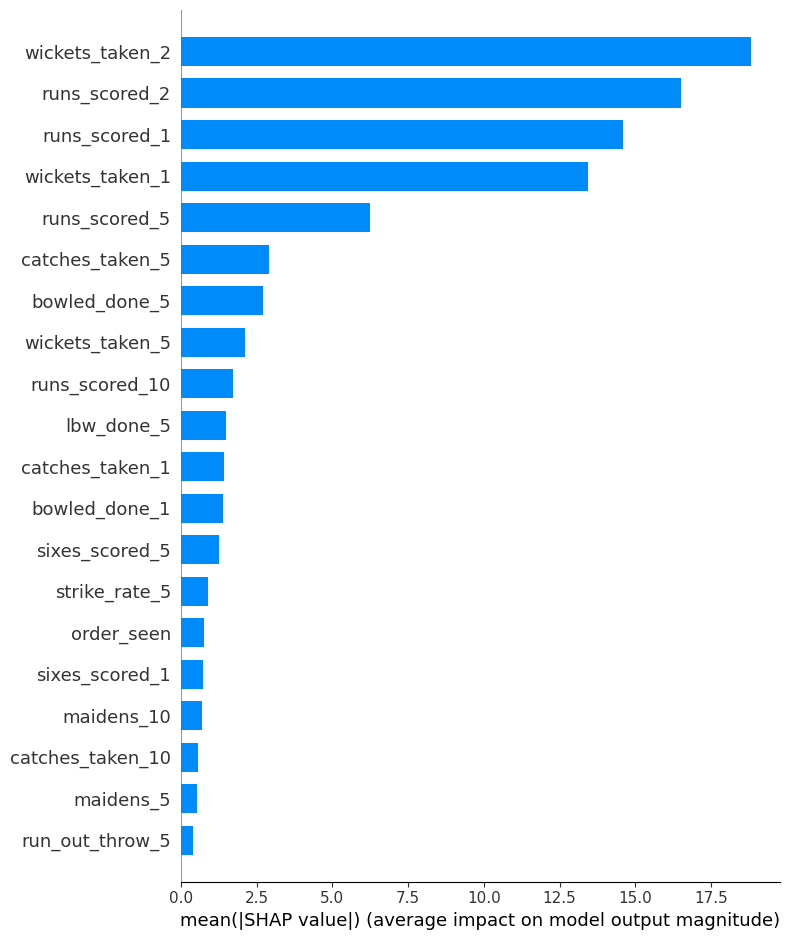

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

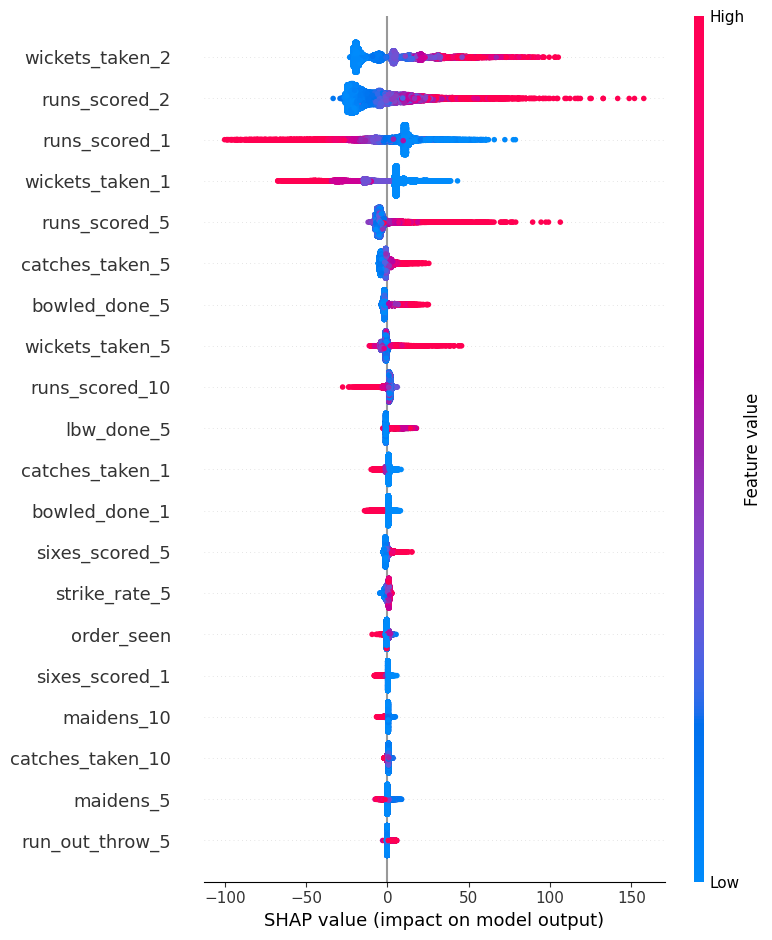

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df

,player_id,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,runs_scored_1,runs_scored_2,runs_scored_5,runs_scored_10,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
0,-0.001629,0.057757,-0.029006,0.122220,-0.151421,-0.071210,-21.073681,11.374671,-3.990495,1.511285,...,0.015728,-0.038857,0.507668,0.207426,1.031251,0.022141,0.078686,0.240809,-0.014818,-1.001685
1,0.000066,0.082979,-0.030308,0.175302,-0.125896,-0.075511,11.560202,-23.435556,-5.703381,1.324438,...,0.019354,-0.212568,0.540640,-0.081362,0.111087,0.022367,0.005204,0.124619,-0.003000,1.165032
2,-0.001432,0.021483,-0.018786,0.165799,-0.194323,-0.089719,2.471525,-12.861815,-5.074744,2.150551,...,0.014718,-0.107677,0.419391,-0.069613,-0.135380,0.022124,0.006141,-0.053949,-0.012086,1.326541
3,0.001965,0.020804,-0.018227,0.179132,-0.191235,-0.095111,7.089895,-8.277220,-5.132044,1.957846,...,0.014801,-0.091486,0.446929,-0.042108,-0.182899,0.009077,0.008102,-0.053300,-0.009863,1.336592
4,-0.003039,0.032117,-0.032314,0.178906,-0.150907,-0.062738,12.132038,-20.674953,-7.135311,1.246330,...,0.014718,-0.111958,0.451195,0.118021,0.758758,0.022155,0.006897,-0.015774,-0.005189,-0.685544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21393,-0.001975,0.059473,-0.021858,0.147383,-0.618301,-0.068369,10.666227,-22.858028,-5.983338,1.205594,...,0.022200,0.106981,0.539066,-0.073164,-1.786523,-0.024220,0.016346,0.226390,0.008217,-0.235421
21394,0.000255,0.097254,0.083598,0.125831,0.140448,-0.060200,10.290816,-21.255638,-5.107365,1.143137,...,0.027472,-0.027609,0.383466,-0.074234,-1.821734,-0.018631,0.006417,0.168886,0.008149,-0.472754
21395,0.001996,0.064856,-0.030221,0.173419,-0.145887,-0.102103,11.656082,-25.113150,-7.213679,1.189662,...,0.017824,-0.265761,0.531331,-0.082897,-1.225368,-0.023947,0.009431,0.174242,0.007939,-0.360076
21396,-0.003575,0.063521,-0.029121,0.190081,-0.143738,-0.101332,11.855569,-24.982847,-7.149767,1.303857,...,0.017791,-0.272646,0.512677,-0.092980,-1.207819,-0.023031,0.009576,0.187281,-0.003427,-0.384533


In [ ]:
test_df_features['predicted_fantasy_score_total'] = fantasy_score_total_predicted

/tmp/ipython-input-65-3441801569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_features['predicted_fantasy_score_total'] = fantasy_score_total_predicted


In [ ]:
test_df_features

,player_id,start_date,name_x,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,...,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen,predicted_fantasy_score_total
178546,2243,2024-07-01,SR Asmussen,31.0,0,0,0,1,0,1409521,...,2.074683e-08,1.878069e-04,155.172414,110.964876,98.056190,100.000000,105.093264,117.360067,0.0,29.758846
178547,3177,2024-07-01,CJ Bowes,12.0,0,0,0,1,0,1409489,...,3.112025e-08,2.295418e-04,77.777778,77.809223,82.543142,100.000000,105.093264,117.360067,1.0,8.759139
178548,1465,2024-07-01,MT Renshaw,17.0,0,0,0,1,0,1386122,...,4.668037e-08,2.805510e-04,77.777778,77.809223,82.543142,114.814815,124.431749,127.881861,4.0,14.848221
178549,5304,2024-07-01,FL Mackay,25.0,0,0,0,1,0,1409521,...,7.002056e-08,3.428957e-04,71.428571,77.824946,83.602111,114.814815,124.431749,127.881861,2.0,21.560675
178550,1001,2024-07-01,ML Schutt,6.0,0,0,0,1,0,1406082,...,2.363194e-07,6.260551e-04,115.151515,95.011237,93.665101,114.814815,124.431749,127.881861,0.0,12.209429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199939,2405,2025-12-05,M Bibi,4.0,0,0,0,1,0,1483767,...,5.309464e-13,2.738798e-07,0.000000,34.673520,44.362290,78.461538,96.210687,107.383141,0.0,12.574080
199940,3139,2025-12-05,PA van Meekeren,51.0,0,1,0,0,0,1481533,...,3.539643e-13,2.240835e-07,0.000000,34.673520,44.362290,46.153846,79.525073,96.250542,0.0,42.021851
199941,5360,2025-12-05,M Wai Siu,10.0,0,0,0,1,0,1483767,...,2.359762e-13,1.833410e-07,0.000000,34.673520,44.362290,46.153846,79.525073,96.250542,0.0,3.668833
199942,691,2025-12-05,Ruchitha Venkatesh,4.0,0,0,0,1,0,1483767,...,4.031874e-12,7.469832e-07,55.555556,40.916443,52.584129,76.562500,111.854475,126.137373,0.0,3.567707


## Evaluation

In [ ]:
evaluation_df = (

    test_df_features.groupby('match_id').apply(

        lambda x: pd.Series({

            'actual_top_11_sum' : x['fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum' : x['predicted_fantasy_score_total'].nlargest(10).sum()

        })

    ).reset_index()

)

/tmp/ipython-input-67-2611152996.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df_features.groupby('match_id').apply(


In [ ]:
evaluation_df

,match_id,actual_top_11_sum,predicted_top_11_sum
0,1375850,531.0,470.430115
1,1375851,449.0,455.774475
2,1375873,623.0,534.903320
3,1375874,565.0,496.170746
4,1385691,644.0,621.266602
...,...,...,...
1989,1484052,564.0,604.015869
1990,1485778,513.0,508.400360
1991,1486225,523.0,418.902222
1992,1486227,490.0,426.991394


In [ ]:
evaluation_df['absolute_percentage_error'] = (
    (evaluation_df['predicted_top_11_sum'] - evaluation_df['actual_top_11_sum']).abs() /
    evaluation_df['actual_top_11_sum']
) * 100


In [ ]:
evaluation_df

,match_id,actual_top_11_sum,predicted_top_11_sum,absolute_percentage_error
0,1375850,531.0,470.430115,11.406758
1,1375851,449.0,455.774475,1.508792
2,1375873,623.0,534.903320,14.140719
3,1375874,565.0,496.170746,12.182169
4,1385691,644.0,621.266602,3.530031
...,...,...,...,...
1989,1484052,564.0,604.015869,7.095012
1990,1485778,513.0,508.400360,0.896616
1991,1486225,523.0,418.902222,19.903973
1992,1486227,490.0,426.991394,12.858899


In [ ]:
mean_absolute_percentage_error = evaluation_df['absolute_percentage_error'].mean()

In [ ]:
print(f"Mean absolute percentage error across all matches : {mean_absolute_percentage_error}" )

Mean absolute percentage error across all matches : 10.244351004545367


In [ ]:
evaluation_df['percentage_error'] = (
        (evaluation_df['predicted_top_11_sum'] - evaluation_df['actual_top_11_sum']) /
    evaluation_df['actual_top_11_sum']
) * 100


In [ ]:
evaluation_df = evaluation_df[evaluation_df['actual_top_11_sum'] != 0]

In [ ]:
mean_percentage_error = evaluation_df['percentage_error'].mean()

In [ ]:
zero_count = (evaluation_df['actual_top_11_sum'] == 0).sum()
print(f"Number of zeros in actual_top_11_sum: {zero_count}")

Number of zeros in actual_top_11_sum: 0


In [ ]:
print(f"Mean percentage error across all matches : {mean_percentage_error}" )

Mean percentage error across all matches : 1.7675819423929742


In [ ]:
evaluation_df

,match_id,actual_top_11_sum,predicted_top_11_sum,absolute_percentage_error,percentage_error
0,1375850,531.0,470.430115,11.406758,-11.406758
1,1375851,449.0,455.774475,1.508792,1.508792
2,1375873,623.0,534.903320,14.140719,-14.140719
3,1375874,565.0,496.170746,12.182169,-12.182169
4,1385691,644.0,621.266602,3.530031,-3.530031
...,...,...,...,...,...
1989,1484052,564.0,604.015869,7.095012,7.095012
1990,1485778,513.0,508.400360,0.896616,-0.896616
1991,1486225,523.0,418.902222,19.903973,-19.903973
1992,1486227,490.0,426.991394,12.858899,-12.858899


## Plotting actual_top_11_sum vs predicted_top_11_sum

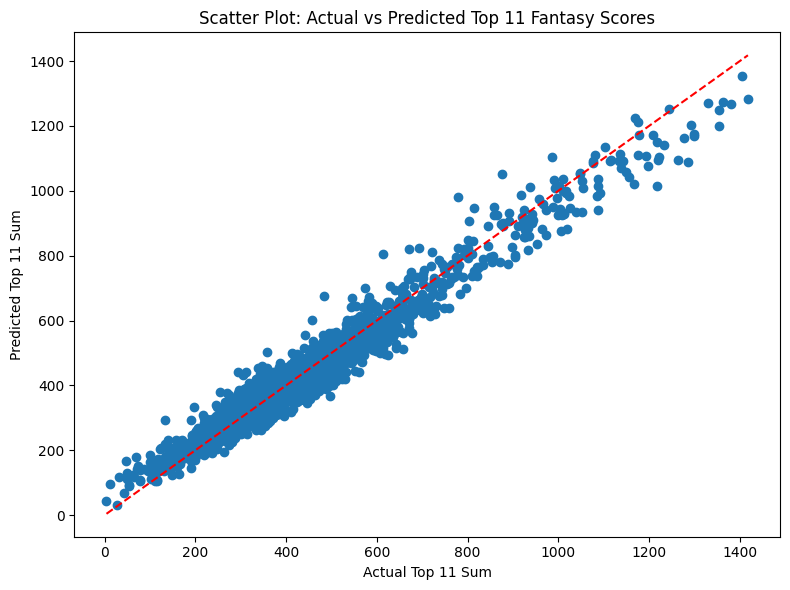

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(
    evaluation_df['actual_top_11_sum'],
    evaluation_df['predicted_top_11_sum'],
)
plt.plot([evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         [evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Scatter Plot: Actual vs Predicted Top 11 Fantasy Scores')

plt.tight_layout()
plt.show()


In [ ]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Applying RFECV:

In [ ]:
model2 = XGBRegressor(n_estimators=100, random_state=42)

In [ ]:
rfecv = RFECV(estimator=model2, step = 1, cv=5, scoring = 'neg_mean_squared_error', n_jobs = -1)
rfecv.fit(X_train_scaled, y_train)

RFECV(cv=5,
      estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, device=None,
                             early_stopping_rounds=None,
                             enable_categorical=False, eval_metric=None,
                             feature_types=None, gamma=None, grow_policy=None,
                             importance_type=None, interaction_constraints=None,
                             learning_rate=None, max_bin=None,
                             max_cat_threshold=None, max_cat_to_onehot=None,
                             max_delta_step=None, max_depth=None,
                             max_leaves=None, min_child_weight=None,
                             missing=nan, monotone_constraints=None,
                             multi_strategy=None, n_estimators=100, n_jobs=None,
                             num_parallel_tree=None, random_state=42, ...),
      n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:

print(f"Number of optimal features: {rfecv.n_features_}")
print("Selected features:", X_train.columns[rfecv.support_].tolist())

Number of optimal features: 42
Selected features: ['match_type_MDM', 'match_type_ODI', 'match_type_ODM', 'match_type_T20', 'match_type_Test', 'runs_scored_1', 'runs_scored_2', 'runs_scored_5', 'runs_scored_10', 'fours_scored_1', 'fours_scored_5', 'fours_scored_10', 'sixes_scored_1', 'sixes_scored_5', 'sixes_scored_10', 'catches_taken_1', 'catches_taken_5', 'catches_taken_10', 'run_out_direct_5', 'run_out_direct_10', 'run_out_throw_1', 'run_out_throw_5', 'stumpings_done_5', 'stumpings_done_10', 'wickets_taken_1', 'wickets_taken_2', 'wickets_taken_5', 'wickets_taken_10', 'bowled_done_1', 'bowled_done_5', 'bowled_done_10', 'lbw_done_5', 'lbw_done_10', 'maidens_1', 'maidens_5', 'maidens_10', 'strike_rate_1', 'strike_rate_5', 'economy_rate_1', 'economy_rate_5', 'economy_rate_10', 'order_seen']


In [ ]:
X_train_selected = rfecv.transform(X_train_scaled)
X_test_selected = rfecv.transform(X_test_scaled)

In [ ]:
model.fit(X_train_selected, y_train)
fantasy_score_total_predicted = model.predict(X_test_selected)

In [ ]:
print("RMSE:", mean_squared_error(y_test, fantasy_score_total_predicted3))
print("R² Score:", r2_score(y_test, fantasy_score_total_predicted3))

In [ ]:
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X_test_selected)
shap.summary_plot(shap_values, X_test_selected, plot_type="bar")

In [ ]:
test_df_features['predicted_fantasy_score_total_exp3'] = fantasy_score_total_predicted3

In [ ]:
evaluation_df = (

    test_df_features.groupby('match_id').apply(

        lambda x: pd.Series({

            'actual_top_11_sum' : x['fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum_exp1' : x['predicted_fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum_exp2' : x['predicted_fantasy_score_total_exp2'].nlargest(10).sum()


        })

    ).reset_index()

)

In [ ]:
evaluation_df['absolute_percentage_error_exp2'] = (
    (evaluation_df['predicted_top_11_sum_exp2'] - evaluation_df['actual_top_11_sum']).abs() /
    evaluation_df['actual_top_11_sum']
) * 100

In [ ]:
evaluation_df['percentage_error_exp2'] = (
        (evaluation_df['predicted_top_11_sum_exp2'] - evaluation_df['actual_top_11_sum']) /
    evaluation_df['actual_top_11_sum']
)*100

In [ ]:
evaluation_df = evaluation_df[evaluation_df['actual_top_11_sum'] != 0]

In [ ]:
mean_absolute_percentage_error = evaluation_df['absolute_percentage_error_exp2'].mean()

In [ ]:
mean_percentage_error = evaluation_df['percentage_error_exp2'].mean()

In [ ]:
print(f"Mean absolute percentage error across all matches : {mean_absolute_percentage_error}%" )

In [ ]:
print(f"percentage error across all matches : {mean_percentage_error}%" )

In [ ]:

plt.scatter(
    evaluation_df['actual_top_11_sum'],
    evaluation_df['predicted_top_11_sum_exp2'],
)
plt.plot([evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         [evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Actual vs Predicted Top 11 Fantasy Scores')

plt.tight_layout()
plt.show()

# TEST

In [ ]:
df_features

,player_id,start_date,name_x,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
0,11182,2001-12-19,C White,49,0,0,0,0,1,63963,...,0.0,0.000000,0.000000,66.666667,66.666667,66.666667,0.000000,0.000000,0.000000,7
1,1878,2001-12-19,SS Das,44,0,0,0,0,1,63963,...,18.0,7.263168,4.666414,35.000000,31.255504,33.429867,38.235294,39.408064,44.769324,0
2,10153,2001-12-19,A Flintoff,84,0,0,0,0,1,63963,...,0.0,1.894752,1.703394,26.666667,29.383256,33.080949,31.176471,40.287642,46.543999,6
3,11344,2001-12-19,N Hussain,62,0,0,0,0,1,63963,...,8.0,2.842127,2.081926,0.000000,30.741551,34.506345,31.176471,40.287642,46.543999,3
4,10707,2001-12-19,ME Trescothick,38,0,0,0,0,1,63963,...,0.0,0.263191,0.766799,67.187500,46.112327,42.174421,16.666667,55.662744,52.779079,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,2025-05-20,E Corney,42,0,0,1,0,0,1462374,...,1.0,0.377848,0.260951,88.059701,109.071925,108.692056,91.666667,99.700640,105.694318,2
416708,7111,2025-05-20,A Wellington,96,0,0,1,0,0,1462374,...,0.0,0.066773,0.096717,66.666667,119.578036,113.277023,91.935484,105.726120,109.504298,7
416709,10032,2025-05-20,C Skelton,13,0,0,1,0,0,1462374,...,0.0,0.100159,0.118210,171.428571,146.033721,123.634881,91.935484,105.726120,109.504298,8
416710,10220,2025-05-20,DP Conway,16,0,0,0,1,0,1473500,...,0.0,0.074637,0.116939,125.000000,131.117036,121.959953,89.285714,95.902567,102.279715,2


In [ ]:
import pandas as pd
import numpy as np
from typing import List
from datetime import datetime

def get_top_11_players(
    player_ids: List[int],
    match_date: str,
    model,
    df_features: pd.DataFrame
) -> pd.DataFrame:
    """
    Get top 11 players based on predicted fantasy scores with player names

    Parameters:
    -----------
    player_ids : List[int]
        List of 22 player IDs
    match_date : str
        Date in format 'YYYY-MM-DD'
    model : trained model
        Your trained ML model for prediction
    df_features : pd.DataFrame
        Your feature-engineered DataFrame with player names

    Returns:
    --------
    pd.DataFrame
        Top 11 players with predicted scores, actual scores, and names
    """

    # Convert date string to datetime
    match_date = pd.to_datetime(match_date)

    # Get latest features for each player before the match date
    player_features = []

    for player_id in player_ids:
        # Get player's historical data up to the match date
        player_data = df_features[
            (df_features['player_id'] == player_id) &
            (df_features['start_date'] <= match_date)
        ].sort_values('start_date')

        if len(player_data) > 0:
            # Get the most recent features for this player
            latest_features = player_data.iloc[-1].copy()
            player_features.append(latest_features)
        else:
            print(f"Warning: No historical data found for player {player_id}")

    if len(player_features) == 0:
        print("Error: No valid player data found")
        return pd.DataFrame()

    # Convert to DataFrame
    features_df = pd.DataFrame(player_features)

    # Model features (exclude non-feature columns)
    model_features = [
        'player_id',
        'match_type_MDM', 'match_type_ODI', 'match_type_ODM', 'match_type_T20', 'match_type_Test',
        'runs_scored_1', 'runs_scored_2', 'runs_scored_5', 'runs_scored_10',
        'fours_scored_1', 'fours_scored_5', 'fours_scored_10',
        'sixes_scored_1', 'sixes_scored_5', 'sixes_scored_10',
        'catches_taken_1', 'catches_taken_5', 'catches_taken_10',
        'run_out_direct_5', 'run_out_direct_10',
        'run_out_throw_1', 'run_out_throw_5', 'run_out_throw_10',
        'stumpings_done_5', 'stumpings_done_10',
        'wickets_taken_1', 'wickets_taken_2', 'wickets_taken_5', 'wickets_taken_10',
        'bowled_done_1', 'bowled_done_5', 'bowled_done_10',
        'lbw_done_5', 'lbw_done_10',
        'maidens_1', 'maidens_5', 'maidens_10',
        'strike_rate_1', 'strike_rate_5', 'strike_rate_10',
        'economy_rate_1', 'economy_rate_5', 'economy_rate_10',
        'order_seen'
    ]

    # Check if all required features are present
    missing_features = [f for f in model_features if f not in features_df.columns]
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        return pd.DataFrame()

    # Prepare features for prediction
    X_pred = features_df[model_features]

    # Make predictions
    predicted_scores = model.predict(X_pred)

    # Create results DataFrame with player names (CHANGED: using 'name_x' column)
    results_df = pd.DataFrame({
        'player_id': features_df['player_id'],
        'player_name': features_df['name_x'],  # CHANGED: Now using 'name_x' column
        'predicted_score': predicted_scores,
        'latest_actual_score': features_df['fantasy_score_total'],
        'last_match_date': features_df['start_date']
    })

    # Sort by predicted score and get top 11
    top_11 = results_df.sort_values('predicted_score', ascending=False).head(11).reset_index(drop=True)

    # Add rank
    top_11['rank'] = range(1, 12)

    return top_11[['rank', 'player_id', 'player_name', 'predicted_score', 'latest_actual_score', 'last_match_date']]


# Helper function to get 22 players from a match
def get_players_from_match(match_id: int, df_features: pd.DataFrame) -> List[int]:
    """Get list of player IDs from a specific match"""
    match_players = df_features[df_features['match_id'] == match_id]['player_id'].unique().tolist()
    return match_players


def display_dream_team(top_11_df: pd.DataFrame):
    """Display the dream team in a beautiful format"""

    print("\n" + "="*80)
    print("🏏 DREAM TEAM - TOP 11 PLAYERS 🏏")

    for _, row in top_11_df.iterrows():
        print(f"{row['rank']:2d}. {row['player_name']:<25} | "
              f"ID: {row['player_id']:<8} | "
              f"Predicted: {row['predicted_score']:6.1f} | "
              f"Last Score: {row['latest_actual_score']:6.1f}")

    print("="*80)
    print(f"💯 Total Predicted Score: {top_11_df['predicted_score'].sum():.1f}")
    print(f"💯 Total Last Actual Score: {top_11_df['latest_actual_score'].sum():.1f}")
    print(f"📊 Average Predicted Score: {top_11_df['predicted_score'].mean():.1f}")
    print(f"🎯 Best Player: {top_11_df.iloc[0]['player_name']} ({top_11_df.iloc[0]['predicted_score']:.1f})")
    print("="*80)

In [ ]:
# Check what match IDs actually exist in your dataset
print("Available match IDs in your dataset:")
available_matches = df_features['match_id'].unique()
print(f"Total matches: {len(available_matches)}")
print(f"Sample match IDs: {available_matches}")  # Show first 10

# Check the specific match ID you tried
print(f"\n{'63963' in available_matches}")

Available match IDs in your dataset:
Total matches: 18896
Sample match IDs: ['63963' '64012' '64022' ... '1462374' '1473500' '1485778']

True


In [ ]:
# Use an actual match ID from your dataset
actual_match_id = '1473461'  # or pick any from the list above

player_ids = get_players_from_match(actual_match_id, df_features)
print(f"Found {len(player_ids)} players in match {actual_match_id}")
print(f"Player IDs: {player_ids}")

# Get top 11 predictions
match_date = "2024-05-15"  # Use a date that makes sense for your data

top_11_dream_team = get_top_11_players(
    player_ids=player_ids,
    match_date=match_date,
    model=model,
    df_features=df_features
)

print("\n🏏 Dream Team - Top 11 Players:")
print(top_11_dream_team)

display_dream_team(top_11_dream_team)

Found 24 players in match 1473461
Player IDs: [179, 8152, 11065, 1989, 2801, 2030, 6072, 4388, 8564, 7946, 5400, 7121, 3677, 2347, 6109, 5888, 2078, 2906, 2097, 4176, 6445, 5232, 9164, 6786]

🏏 Dream Team - Top 11 Players:
    rank  player_id    player_name  predicted_score  latest_actual_score  \
0      1       6109       T Stubbs       108.047241                  111   
1      2       5232     Yash Dayal       105.227036                  117   
2      3        179   JR Hazlewood        95.645485                  133   
3      4       9164     RM Patidar        77.102676                   77   
4      5       5400      MM Sharma        73.131950                   83   
5      6       7946  Abishek Porel        66.510277                   87   
6      7       5888      JM Sharma        59.794235                   44   
7      8       2097        B Kumar        49.304966                   60   
8      9       8564        V Kohli        41.260059                   44   
9     10       20

In [ ]:
from sklearn.ensemble import VotingRegressor
import pandas as pd
from tabulate import tabulate

def predict_top_11_v2(player_ids, match_date, xgb_model, rf_model, feature_data):
    """
    Predict top 11 players from given player_ids and match date.
    Uses ensemble of XGBoost and Random Forest.
    Assumes feature_data is a DataFrame with player features + 'actual_score' + 'name'.
    """

    valid_data = feature_data[(feature_data["player_id"].isin(player_ids)) &
                              (feature_data["date"] < match_date)]

    latest_features = valid_data.sort_values("date").groupby("player_id").tail(1)

    feature_cols = ["runs", "wickets", "ema_score", "balls_faced"]
    X = latest_features[feature_cols]

    xgb_preds = xgb_model.predict(X)
    rf_preds = rf_model.predict(X)
    ensemble_preds = (xgb_preds + rf_preds) / 2


    latest_features["predicted_score"] = ensemble_preds


    top_11 = latest_features.sort_values("predicted_score", ascending=False).head(11)

    print(tabulate(top_11[["player_id", "name", "predicted_score", "actual_score"]],
                   headers="keys", tablefmt="fancy_grid"))

    return top_11[["player_id", "name", "predicted_score", "actual_score"]]
